<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

<h2>Zadanie 2.</h2>

<h3>$f(x) = x^2 - 3x + 2 = (x-1)(x-2) = 0$</h3>

In [2]:
# define function f
def f(x):
    return x**2 - 3*x + 2

<h3>$\phi_1(x) = (x^2 + 2)/3$</h3>

<h3>$\phi_2(x) = \sqrt{3x - 2}$</h3>

<h3>$\phi_3(x) = 3 - 2/x$</h3>

<h3>$\phi_4(x) = (x^2 - 2)/(2x - 3)$</h3>

In [3]:
# define phi 1
def phi1(x):
    return (x**2 + 2)/3

# define phi 2
def phi2(x):
    return np.sqrt(3*x - 2)

# define phi 3
def phi3(x):
    return 3 - 2/x

# define phi 4
def phi4(x):
    return (x**2 - 2)/(2*x - 3)

Funkcja wykonująca iteracje

In [4]:
# iteration function
def iterate(phi, x0, iters=10):
    xs = [x0] * (iters+1)
    for i in range(iters):
        x0 = phi(x0)
        xs[i+1] = x0
    return np.array(xs)

Wartości w kolejnych iteracjach dla $\phi_i$

In [5]:
# define arbitrary x0
x0 = 3
# get iter values for phi
xs_phi1 = iterate(phi1, x0)
xs_phi2 = iterate(phi2, x0)
xs_phi3 = iterate(phi3, x0)
xs_phi4 = iterate(phi4, x0)
# show the values in DataFrame
pd.DataFrame(
    data=np.array([xs_phi1, xs_phi2, xs_phi3, xs_phi4]).T,
    columns=[rf"$\phi_{i}$" for i in range(1,5)],
    index=[f"iter {i}" for i in range(11)]
)

,$\phi_1$,$\phi_2$,$\phi_3$,$\phi_4$
iter 0,3.000000e+00,3.000000,3.000000,3.000000
iter 1,3.666667e+00,2.645751,2.333333,2.333333
iter 2,5.148148e+00,2.436648,2.142857,2.066667
iter 3,9.501143e+00,2.304332,2.066667,2.003922
iter 4,3.075724e+01,2.216528,2.032258,2.000015
iter 5,3.160026e+02,2.156289,2.015873,2.000000
iter 6,3.328655e+04,2.113970,2.007874,2.000000
iter 7,3.693315e+08,2.083725,2.003922,2.000000
iter 8,4.546858e+16,2.061838,2.001957,2.000000
iter 9,6.891304e+32,2.045853,2.000978,2.000000


Funkcja obliczająca eksperymentalnie rząd zbieżności

In [6]:
# function calculating order of convergence
def order_of_conv(xs, true_value):
    errs = np.abs(xs - true_value)
    errs = errs[errs > 1e-20]
    rs = np.log(errs[1:-1]/errs[2:]) / np.log(errs[:-2]/errs[1:-1])
    return ["{:.6f}".format(r) for r in rs] + ['-']*(len(xs)-len(rs)-2)

Eksperymentalne rządy zbieżności dla $\phi_i$

In [7]:
# calculate orders of convergence for phi
r_phi1 = order_of_conv(xs_phi1, 2)
r_phi2 = order_of_conv(xs_phi2, 2)
r_phi3 = order_of_conv(xs_phi3, 2)
r_phi4 = order_of_conv(xs_phi4, 2)
# show DataFrame of orders of convergence
pd.DataFrame(
    data=np.array([r_phi1, r_phi2, r_phi3, r_phi4]).T,
    columns=[rf"$\phi_{i}$" for i in range(1,5)],
    index=[f"r (k = {i})" for i in range(1,10)]
)

,$\phi_1$,$\phi_2$,$\phi_3$,$\phi_4$
r (k = 1),1.245021,0.894696,0.771244,1.464974
r (k = 2),1.365183,0.922621,0.899495,1.760374
r (k = 3),1.547766,0.942910,0.952498,1.958580
r (k = 4),1.778874,0.957728,0.976872,1.998598
r (k = 5),1.950815,0.968608,0.988585,-
r (k = 6),1.997311,0.976632,0.994329,-
r (k = 7),1.999987,0.982574,0.997173,-
r (k = 8),2.000000,0.986987,0.998589,-
r (k = 9),2.000000,0.990272,0.999295,-


Funkcja rysująca błąd względny metod w zależności od iteracji

In [8]:
# plot relative error by number of iterations
def plot_rel_err_by_iter(xs, errors, labels, title):
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(title)
    plt.xlabel("number of iterations")
    plt.ylabel("relative error")
    # plot function and tangents
    for i in range(len(errors)):
        p = plt.plot(xs, errors[i], label=labels[i])
    # show with legend
    plt.yscale("log")
    plt.legend()
    plt.grid()
    plt.show()

Błędy względne dla wszystkich metod w zależności od iteracji

In [9]:
# define relative errors for all methods
err_phi1 = np.abs((xs_phi1-2) / 2)
err_phi2 = np.abs((xs_phi2-2) / 2)
err_phi3 = np.abs((xs_phi3-2) / 2)
err_phi4 = np.abs((xs_phi4-2) / 2)

Wykres błędu względnego dla wszystkich $\phi_i$

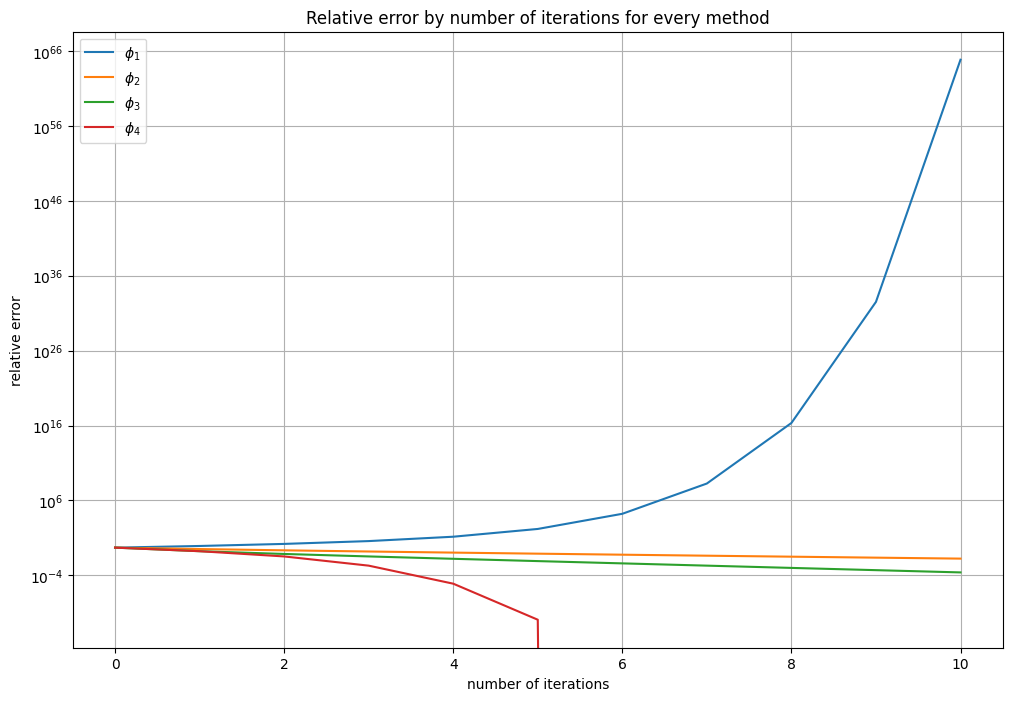

In [10]:
# plot errors for all methods
plot_rel_err_by_iter(
    np.arange(0, 11, 1),
    [err_phi1, err_phi2, err_phi3, err_phi4],
    [rf"$\phi_{i}$" for i in range(1, 5)],
    "Relative error by number of iterations for every method"
)

Wykres błędu względnego dla zbieżnych $\phi_i$

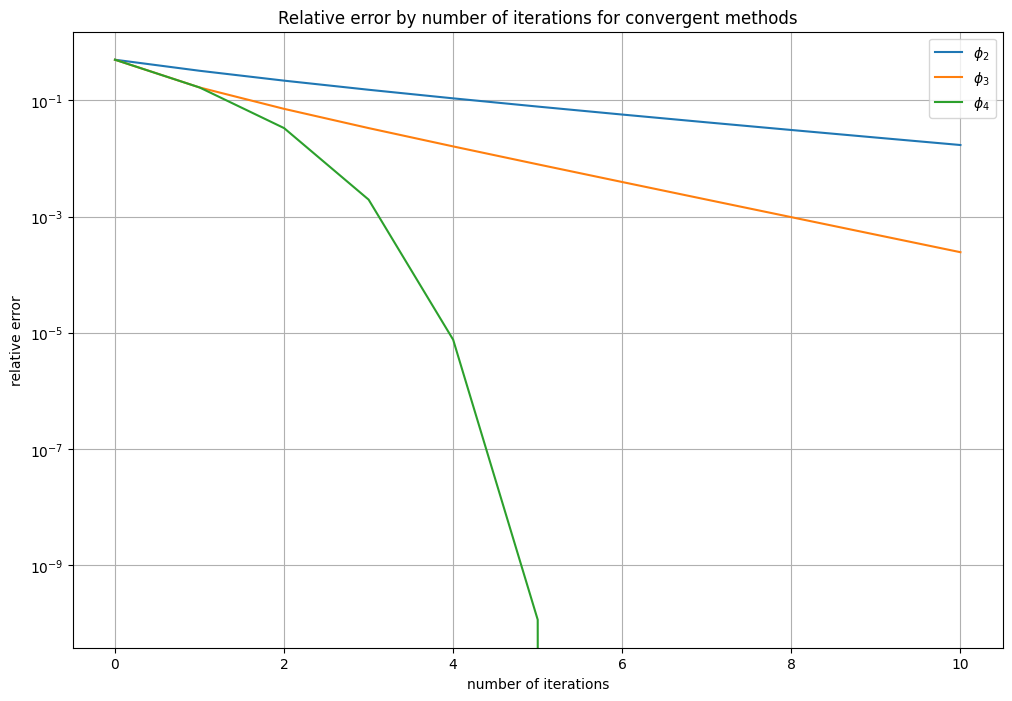

In [11]:
# plot errors for all methods
plot_rel_err_by_iter(
    np.arange(0, 11, 1),
    [err_phi2, err_phi3, err_phi4],
    [rf"$\phi_{i}$" for i in range(2, 5)],
    "Relative error by number of iterations for convergent methods"
)